In [1]:
# This program produces plots of the "nino3.4" monthly sea surface temperatures
# for different periods and different climatologies.  The nino3.4 index is used 
# as an indicator of the polarity and strength of the El Niño / Southern Oscillation
# phenomenon.
#
# Todd Mitchell, May 2023

import numpy as np
import matplotlib.pyplot as plt
import sys
from subprocess import call
import pandas as pd

# tpm.py is also on this repository, is a module of geophysical data analysis and plotting functions.
# "TPM" are my initials.
sys.path.insert( 0, '/Users/mitchell/Documents/PYTHON/modules/mitchell/' )
import tpm   
# dir(tpm) 

# Need this line to view plots in jupyter notebook
%matplotlib inline

In [2]:
# Download data from the NOAA Climate Prediction Center
# The "91-20" in the filename refers to the 1991-2020 climatology used in the dataset.
fn = 'ersst5.nino.mth.91-20.ascii'
# call( [ 'wget', '--no-check-certificate', 'https://www.cpc.ncep.noaa.gov/data/indices/' + fn ] ) 

In [5]:
!cat ersst5.nino.mth.91-20.ascii


 YR   MON  NINO1+2  ANOM   NINO3    ANOM   NINO4    ANOM   NINO3.4  ANOM
1950   1   23.01   -1.55   23.56   -2.10   26.94   -1.38   24.55   -1.99
1950   2   24.32   -1.78   24.89   -1.52   26.67   -1.53   25.06   -1.69
1950   3   25.11   -1.38   26.36   -0.84   26.52   -1.80   25.87   -1.42
1950   4   23.63   -1.90   26.44   -1.14   26.90   -1.73   26.28   -1.54
1950   5   22.68   -1.74   25.69   -1.57   27.73   -1.18   26.18   -1.75
1950   6   21.33   -1.79   25.51   -1.11   28.13   -0.84   26.46   -1.27
1950   7   20.31   -1.65   24.91   -0.90   27.64   -1.26   26.29   -1.01
1950   8   20.12   -0.88   24.47   -0.65   27.54   -1.25   25.88   -0.97
1950   9   19.56   -1.17   24.01   -0.89   27.27   -1.49   25.74   -0.98
1950  10   19.99   -1.02   24.17   -0.81   27.13   -1.63   25.69   -1.03
1950  11   19.85   -1.80   23.86   -1.24   26.99   -1.70   25.47   -1.23
1950  12   21.72   -1.09   24.15   -1.08   27.14   -1.40   25.29   -1.31
1951   1   24.11   -0.46   24.79   -0.87   27.21   

In [3]:
# Ingest the data
df = pd.read_csv( fn, delimiter=r"\s+" )
print( df.dtypes.index.to_list() )
yr1 = df[ 'YR' ].min()  # Determine the first and last years of data
yr2 = df[ 'YR' ].max()
print( f'The timeseries span {yr1} through {yr2}' )

['YR', 'MON', 'NINO1+2', 'ANOM', 'NINO3', 'ANOM.1', 'NINO4', 'ANOM.2', 'NINO3.4', 'ANOM.3']
The timeseries span 1950 through 2023


In [4]:
# The nino3.4 anomaly timeseries is column 9 of the table.  The anomalies are with
# respect to a 1991-2020 climatology
ts = df.iloc[ :, 9 ]
# The last year of data is often incomplete.  I want whole years to analyze.  
# Add nan's to complete years if necessary.
ts = tpm.fill_year( ts )


In [5]:
# call( [ '/bin/rm', 'ersst5.nino.mth.91-20.ascii' ] )  # Delete the ascii file

nyr = yr2 - yr1 + 1
nt = nyr * 12

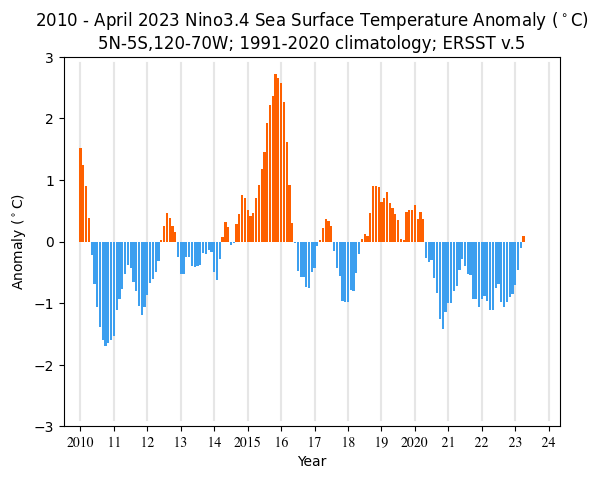

In [6]:
# Make a plot for 2010 - present.  The data spans 1950 - present.

# I want to plot above (below) normal temperatures in red (blue).  Define the colors.
red  = tuple( np.asarray( [ 255,  96,   0, 256 ] ) / 256 )
blue = tuple( np.asarray( [  60, 160, 240, 256 ] ) / 256 )

x = np.arange( 1, len(ts)+1 ).astype( float )  # Define an index of abscissa points                       
skip =int( ( 2010 - yr1 ) * 12 )
x2  = x[  skip: ]
ts2 = ts[ skip: ]

ymax = max( np.abs( ts2 ) )
plt.clf()
plt.bar( x2[ ts2>=0 ], ts2[ ts2>=0 ], zorder=5, color=red )
plt.bar( x2[ ts2< 0 ], ts2[ ts2< 0 ], zorder=5, color=blue )
plt.ylim( ( -3, 3 ))
plt.xlim( ( skip-5, nt+5 ) )
tpm.plot_vertical_lines( ( skip+1, nt+12, 12 ), ( -2.9, 2.9 ), -1 )  # plot under the bars
plt.xticks( np.arange( skip+1, nt+12, step=12 ), ( '2010', ' 11 ', ' 12 ', ' 13 ', ' 14 ',
   '2015', ' 16 ', ' 17 ', ' 18 ', ' 19 ', '2020', ' 21 ', ' 22 ', ' 23 ', ' 24 ' ), \
          font='Times')
plt.title( r'2010 - April 2023 Nino3.4 Sea Surface Temperature Anomaly ($^\circ$C)'
           '\n' r'5N-5S,120-70W; 1991-2020 climatology; ERSST v.5' )
plt.xlabel( 'Year')
plt.ylabel( 'Anomaly ($^\circ$C)')
# Saving the file as PS or PDF eliminates the aliasing you see in the plot.
plt.savefig( 'sstanomnino342010apr2023.png', dpi=300 )  
plt.show()
!open sstanomnino342010apr2023.png

# The runtime error you get with incomplete years, years that don't have data through December, 
# is that ts2 has missing values ( nan's ) for the months without data.  I expect that there 
# is a way to turn that error-message off.


yr1, yr1clim, yr2clim, skip, nt2
 1 1 74 0 888
 <class 'numpy.ndarray'>
The maximum absolute value is 2.9279452054794524


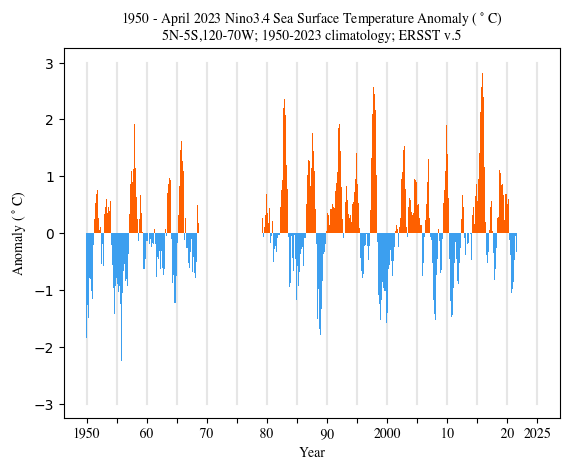

In [7]:
# The data spans 1950 - present.  Plot anomalies for the entire record.

red  = tuple( np.asarray( [ 255,  96,   0, 256 ] ) / 256 )
blue = tuple( np.asarray( [  60, 160, 240, 256 ] ) / 256 )

x = np.arange( 1, len(ts)+1 ).astype( float )  # An index of abscissa points                       
skip = 0 
x2  = x[  skip: ]
ts2 = ts[ skip: ]
anom = tpm.anomalies( ts2 )[0]  # Anomalies are with respect to the entire record
print( f" {type( anom )}" )

ymax = max( np.abs( anom ) )
print( f"The maximum absolute value is {ymax}" )

plt.clf()
# The positive and negative values are plotted separately in red and blue, respectively
plt.bar( x2[ anom>=0 ], anom[ anom>=0 ], zorder=5, color=red )
plt.bar( x2[ anom< 0 ], anom[ anom< 0 ], zorder=5, color=blue )
plt.ylim( ( -3.25, 3.25 ))
# plt.xlim( ( skip-15, nt+60 ) )
tpm.plot_vertical_lines( ( skip+1, nt+12, 60 ), ( -3, 3 ), -1 )  # plot under the bars
plt.xticks( np.arange( skip+1, nt+72, step=60 ), \
   ('1950', '    ', ' 60 ', '    ', \
    ' 70 ', '    ', ' 80 ', '    ', ' 90 ', '    ', '2000', '    ', ' 10 ', '    ', \
    ' 20 ', '2025' ), font='Times' )
plt.title( r'1950 - April 2023 Nino3.4 Sea Surface Temperature Anomaly ($^\circ$C)'
           '\n' r'5N-5S,120-70W; 1950-2023 climatology; ERSST v.5', font='Times' )
plt.xlabel( 'Year', font='Times')
plt.ylabel( 'Anomaly ($^\circ$C)', font='Times' )
# Saving the file as PS or PDF eliminates the aliasing you see in the plot.
plt.savefig( 'sstanomnino341950apr2023.png', dpi=500 )  
plt.show()
!open sstanomnino341950apr2023.png

# The runtime error you get with incomplete years, years that don't have data through December, 
# is that ts2 has missing values ( nan's ) for the months without data.  I expect that there 
# is a way to turn that error-message off.


In [24]:
# Calculate and plot an "annualized" index.
# Nino3.4 SST anomalies exhibit strong autocorrelation beginning in July and they become
# small the following April-May-June.
# Calculate July through June 12-month averages, and ascribe them to the year of the January.
# Use tpm.time_shift to prepend an nan for 1950.
tsann = tpm.time_shift( tpm.annualize( anom, first=6 ), 1951, 2023, 1950, 2023, 1 )

The maximum absolute value is 1.9433939590275207


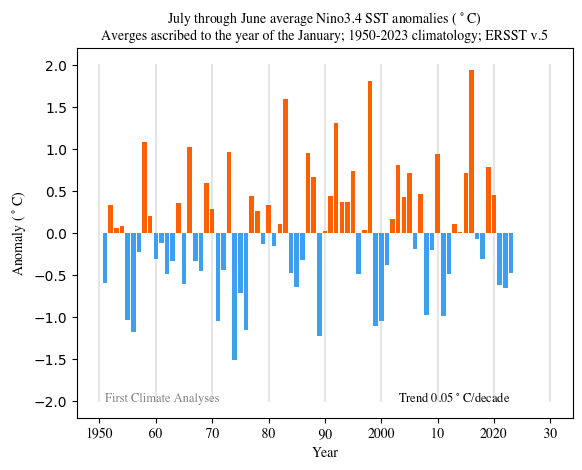

In [72]:
# Plot annualized values
x = np.arange( 0, len(tsann) ).astype( float )  # An index of abscissa points                       

ymax = np.nanmax( np.abs( tsann ) )
print( f"The maximum absolute value is {ymax}" )

plt.clf()
# The positive and negative values are plotted separately in red and blue, respectively
plt.bar( x[ tsann>=0 ], tsann[ tsann>=0 ], zorder=5, color=red )
plt.bar( x[ tsann< 0 ], tsann[ tsann< 0 ], zorder=5, color=blue )
plt.ylim( ( -2.2, 2.2 ))
# plt.xlim( ( skip-15, nt+60 ) )
tpm.plot_vertical_lines( ( 0, tsann.shape[0], 10 ), ( -2, 2 ), -1 )  # plot under the bars
plt.xticks( np.arange( 0, tsann.shape[0]+10, step=10 ), \
   ('1950', ' 60 ', ' 70 ', ' 80 ', ' 90 ', '2000', ' 10 ', '2020', ' 30 ' ), font='Times' )
plt.title( r'July through June average Nino3.4 SST anomalies ($^\circ$C)'
           '\n' r'Averges ascribed to the year of the January; 1950-2023 climatology; ERSST v.5', font='Times' )
plt.xlabel( 'Year', font='Times')
plt.ylabel( 'Anomaly ($^\circ$C)', font='Times' )
plt.text( 53, -2, 'Trend 0.05$^\circ$C/decade', fontsize=9, font='Times' )  # See below
plt.text( 1, -2, 'First Climate Analyses', color='gray', fontsize=9, font='Times' )
# Saving the file as PS or PDF eliminates the aliasing you see in the plot.
plt.savefig( 'sstanomnino34_JulthroughJunaverages_19502023.png', dpi=300 )  
plt.show()
!open sstanomnino34_JulthroughJunaverages_19502023.png


In [49]:
# What is the trend in the annualized values?
# See https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy
coef = np.polyfit(x[1:],tsann[1:],1)
coef
# 0.05 C/decade
# compare with the figure Mike McPhaden showed from the review paper

array([ 0.0045859 , -0.16108773])